# Investigação sobre o efeito Stroop
### Projeto de análise estatística para o Nanodegree em Análise de Dados do Udacity
*José Lacerda - 17/10/2016*

**Versão revisada ressubmetida em 18/10/2016** 

-----

Esta análise tem como objetivo verificar o [Efeito Stroop](https://en.wikipedia.org/wiki/Stroop_effect) analisando o tempo de reação de participantes submetidos a um teste padrão. No teste, os participantes são apresentados a dois conjuntos de palavras: um **congruente**, em que as cores das palavras correspondem aos seus respectivos nomes, e um **incongruente**, com palavras cujos nomes diferem das cores em que são apresentadas. Em ambos os casos, os participantes devem dizer em voz alta os nomes das cores das palavras, e não as palavras em si. 

O documento é dividido em cinco tópicos que buscam responder às questões levantadas no detelhamento do projeto de Estatística do [Nanodegree Analista de Dados](https://br.udacity.com/course/data-analyst-nanodegree--nd002/) do Udacity. A sexta questão (opcional) está comentada ao longo deste documento.

Para a elaboração e cálculos estatísticos é utilizada a ferramenta **Jupyter Notebook** com as bibliotecas `pandas` e `numpy`. 

## 1 - Variáveis do estudo

A **variável independente** do estudo é o tipo de conjunto de palavras, que pode ser congruente ou incongruente.
A **variável dependente** é o tempo, em segundos, que o participante do estudo leva para falar o nome das cores das palavras presentes no conjunto.

## 2 - Hipótese a ser verificada

Queremos verificar o efeito da interferência no tempo de reação de uma determinada tarefa, conforme analisado pelo pesquisador J. Ridley Stroop em seu [famoso experimento](http://psychclassics.yorku.ca/Stroop/), publicado em 1935. Segundo Stroop, a interferência contribui negativamente para a execução da tarefa, causando tempos de reação mais longos e maior ocorrência de erros.

Logo, a hipótese é a de que os tempos de reação para as tarefas congruentes serão **significativamente** menores do que para as tarefas incongruentes. Assim, sendo $\mu_c$ a média dos tempos para o conjunto congruente e $\mu_i$ a média dos tempos para o conjunto incongruente, temos:

<br>
$$ H_0: \mu_c \geq \mu_i $$
$$ H_a: \mu_c < \mu_i $$

Ou então:

$$ H_0: \mu_c - \mu_i \geq 0 $$
$$ H_a: \mu_c - \mu_i < 0 $$

Como o mesmo grupo de pessoas é submetido aos dois conjuntos de palavras, iremos aplicar o **teste-t dependente para amostras pareadas para duas condições**. Também adotaremos um **nível de significância de 0.05 (5%)**.

## 3 - Importando e explorando os dados

Os dados do experimento estão no arquivo `stroopdata.csv`. Vamos importar e explorar um pouco.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

data = pd.read_csv('stroopdata.csv')
data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


Cada linha da tabela representa um participante do experimento.

**Qual o tamanho da nossa amostra, ou seja, qual o nosso "n"?**

In [2]:
n = len(data)
n

24

Como queremos analisar as diferenças entre os tempos das tarefas, vamos criar uma nova coluna na tabela com esses valores:

In [3]:
data['Diff'] = data['Congruent'] - data['Incongruent']
data.head()

,Congruent,Incongruent,Diff
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


Agora, vamos levantar uma **medida de tendência central (média)**...

In [4]:
media = data['Diff'].mean()
media

-7.964791666666667

 ...e uma **medida de variabilidade (desvio padrão)**:

In [5]:
desvio_padrao = data['Diff'].std()
desvio_padrao

4.864826910359056

## 4 - Visualizando a distribuição da amostra

Vamos gerar três histogramas para visualizar a distribuição da amostra. Os dois primeiros para os resultados dos testes congruentes e incongruentes, e um terceiro para a diferença nos tempos observados. Dada a quantidade da nossa amostra, vamos estabelecer o número de classes (bins) em 5.

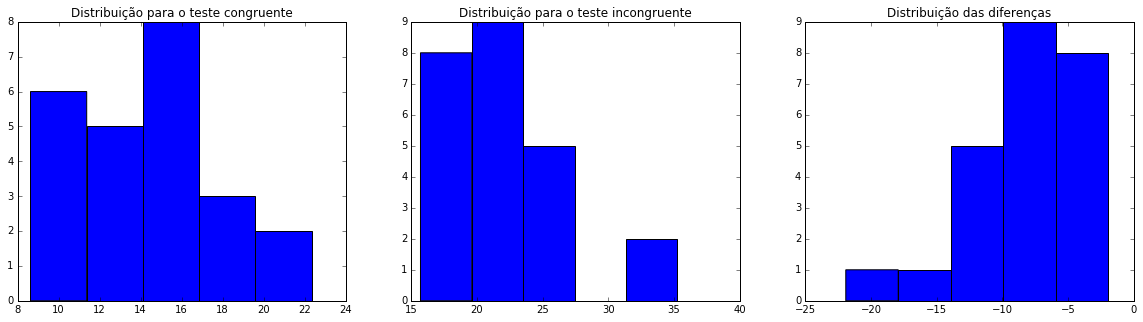

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax0, ax1, ax2 = axes.flat

ax0.hist(data['Congruent'], bins=5)
ax0.set_title('Distribuição para o teste congruente')

ax1.hist(data['Incongruent'], bins=5)
ax1.set_title('Distribuição para o teste incongruente')

ax2.hist(data['Diff'], bins=5)
ax2.set_title('Distribuição das diferenças')

plt.show()

Com base nas visualizações, não é possível afirmar que se tratam de distribuições normais. Talvez isto se deva à quantidade reduzida da amostra. Nos dois primeiros histogramas nota-se uma distribuição **positivamente inclinada**, ao passo que na distribuição das diferenças a distribuição parece **negativamente inclinada**.

## 5 - Teste estatístico e resultados

Sabemos que a fórmula para a estatística t é:

## $$t = \frac{\mu_c - \mu_i}{\frac{s}{\sqrt{n}}}$$

Sabemos também que a diferença das médias $\mu_c - \mu_i$ é igual à média das diferenças já calculada. Então podemos calcular t substituindo os valores na fórmula.

In [7]:
t = media/(desvio_padrao/np.sqrt(n))
t

-8.020706944109957

Adotamos o nível de significância de 0,05. E como nossa hipótese representa uma inequação (valor inferior a zero), a hipótese **é monocaudal**.

Sabemos que **n = 24**, logo temos **24 - 1 = 23** graus de liberdade.

Vamos utilizar a [Tabela-t](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg) para verificar o valor crítico de t, buscando a linha correspondente a 23 graus de liberdade e a coluna representando nosso valor-*p* de .05.

O valor crítico é **(+-) 1.714**. E, ainda segundo a tabela, nosso **nível de confiança é de 95%**.

Ou seja, nossa estatística t é bem inferior ao valor crítico. **Logo, podemos rejeitar a hipótese nula e considerar que existe uma diferença significativa no resultado dos testes congruentes e incongruentes**.

Ressalta-se que este resultado está alinhado com os experimentos originais feitos por Stroop, demonstrando o efeito da interferência no tempo de execução de uma tarefa.